
Logistic Regression Results:
Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.99      0.99      0.99       108

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200


SVM Results:
Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.99      0.99      0.99       108

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



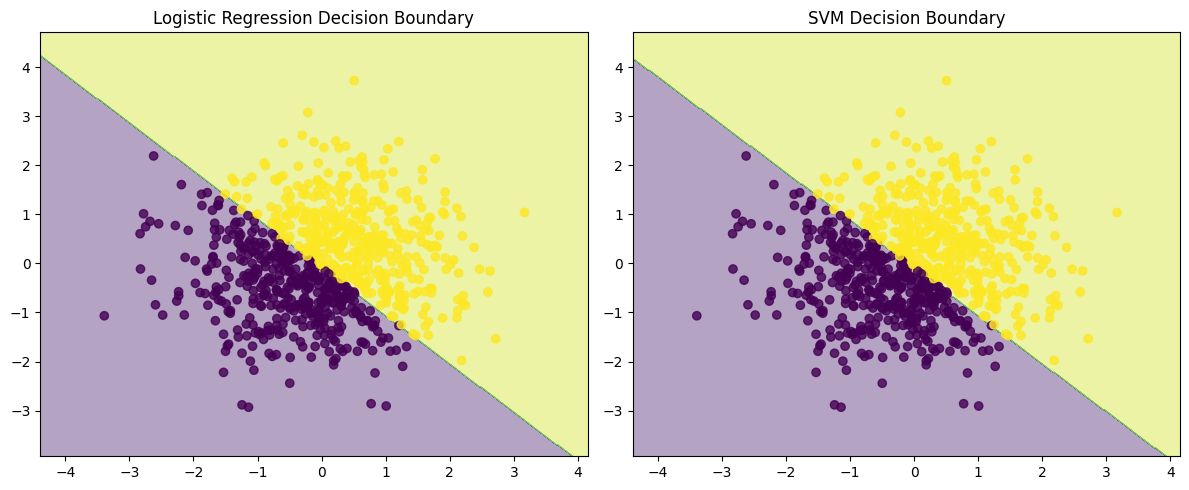

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Business Understanding
# Goal: Compare Logistic Regression and SVM on a simple classification task

# Data Understanding
def generate_sample_data(n_samples=1000):
    """Generate synthetic data for binary classification"""
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)
    return X, y

# Data Preparation
def prepare_data(X, y):
    """Split and scale the data"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Modeling
def train_models(X_train, y_train):
    """Train both models"""
    # Logistic Regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)

    # SVM
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train, y_train)

    return lr, svm

# Evaluation
def evaluate_models(models, X_test, y_test, model_names):
    """Evaluate and compare models"""
    results = {}

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        results[name] = {
            'accuracy': accuracy,
            'report': report
        }

    return results

# Visualization
def plot_decision_boundaries(X, y, models, model_names):
    """Plot decision boundaries for both models"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for ax, model, name in zip(axes, models, model_names):
        # Create grid
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, 0.02),
            np.arange(y_min, y_max, 0.02)
        )

        # Plot decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.4)

        # Plot training points
        ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
        ax.set_title(f'{name} Decision Boundary')

    plt.tight_layout()
    return fig

def main():
    # Generate data
    X, y = generate_sample_data()

    # Prepare data
    X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(X, y)

    # Train models
    lr_model, svm_model = train_models(X_train_scaled, y_train)

    # Evaluate models
    results = evaluate_models(
        [lr_model, svm_model],
        X_test_scaled,
        y_test,
        ['Logistic Regression', 'SVM']
    )

    # Print results
    for name, metrics in results.items():
        print(f"\n{name} Results:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print("Classification Report:")
        print(metrics['report'])

    # Visualize decision boundaries
    plot_decision_boundaries(
        X_train_scaled,
        y_train,
        [lr_model, svm_model],
        ['Logistic Regression', 'SVM']
    )
    plt.show()

if __name__ == "__main__":
    main()